In [1]:
using constants
using types
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")
Eoff=3.0
Ts=collect(300.0:10.0:800.0)
numofn=[-1.5e20]#,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
numofnn=[1e17]
xs=[0.287]#collect(0.0:0.01:1.0)

var0=[Ts[1],xs[1]]
Eoff=0.0
Ev(var)=Eoff
Ec(var)=0.0 #Ev(var)+EgSiGe(var[1],var[2]) #var[1]:T var[2]:x

effMassV(var)=-1.2*me
effMassC(var)=1.4*me#1.4/6^(2/3)*me

bandC=parBandTx(effMassC(var0),0.0,Ec(var0),[Ec],[effMassC],var0)
bandV=parBandTx(effMassV(var0),0.0,Ev(var0),[Ev],[effMassV],var0)
#bndstTx=BandStrucTx([bandV,bandC,bandC,bandC,bandC,bandC,bandC],var0)
bndstTx=BandStrucTx([bandC],var0)
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst var[9]:NNI
#DefP=[3.8,7.0]
ksi=21.0
tauAC(var)=tauAC_func(ClSiGe(var[4],var[2]),DefP(var[1]),var[2],var[1],var[3],var[6])
tauII2(var)=tauII2_func(ksi*eps0,eps0,var[6],var[5],var[2],var[7],var[1],var[3],var[8])
tauNI(var)=tauNI_func(ksi*eps0,var[1],var[9])
vartau0=[bandC.effMass,Ts[1],Ec(var0),xs[1],Ec(var0),bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
#vartau0=[bandC.effMass,Ts[1],1.0,xs[1],1.5,bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
tauTOTTx=tau_electron_B([tauAC],vartau0)#tauNI,,tauII2
xmax=3.0

3.0

In [ ]:
NumofnMultiBand2(bndstTx,5.0+2.0,300.0,3.0)

In [ ]:
@time Numofn2(bandC,5.0+2.0,300.0,3.0)

In [ ]:
@time Numofn(bandC,5.0+2.0,300.0,3.0)

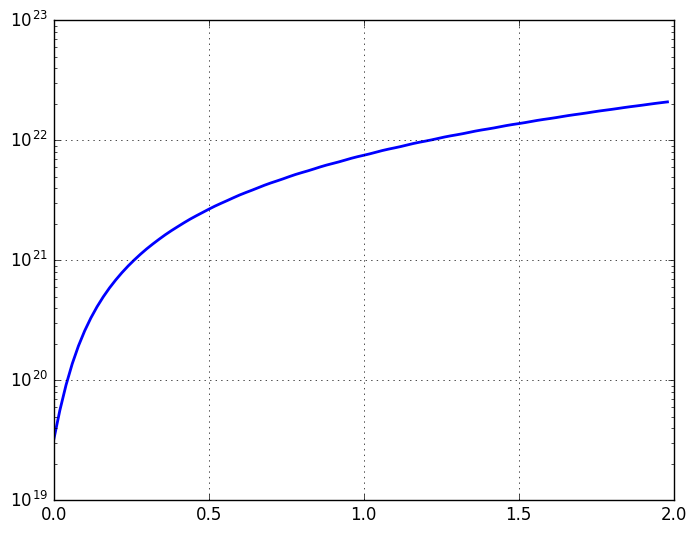

In [2]:
E=collect(0.0:0.02:1.98)
Energy=Array{Float64}(length(E))
numofn_test=Array{Float64}(length(E))
for (e,ex) in enumerate(E)
    numofn_test[e]=-NumofnMultiBand2(bndstTx,ex+0.0,300.0,3.0)
end
semilogy(E,numofn_test*1e-6,Linestyle="-",Linewidth="2",color="b")
grid()

In [ ]:
E=collect(1.0:1.0:100)
Energy=Array{Float64}(length(E))
tauAC_test=Array{Float64}(length(E))
for (e,ex) in enumerate(E)
    vartau_test=[bandC.effMass,300.01,ex+Ec([300.01,0.287]),0.287,0.0,bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
    #vartau_test=[bandV.effMass,300.01,ex+Ec([300.01,0.287]),0.287,0.0,bandV,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
    #Energy[e]=EgSiGe(300.0,0.287)#Ec(vartau_test)
    tauAC_test[e]=tauAC(vartau_test)
end
plot(E,tauAC_test,Linestyle="-",Linewidth="2",color="b")
grid()

In [ ]:
E=collect(1.0:1.0:100)
Energy=Array{Float64}(length(E))
tauII2_test=Array{Float64}(length(E))
for (e,ex) in enumerate(E)
    vartau_test=[bandC.effMass,300.01,ex+Ec([300.01,0.287]),0.287,0.0,bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
    #vartau_test=[bandV.effMass,300.01,ex+Ec([300.01,0.287]),0.287,0.0,bandV,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
    #Energy[e]=EgSiGe(300.0,0.287)#Ec(vartau_test)
    tauII2_test[e]=tauII2(vartau_test)
end
plot(E,tauII2_test,Linestyle="-",Linewidth="2",color="b")
grid()

In [ ]:
tauNI2_test=Array{Float64}(length(E))
for (e,ex) in enumerate(E)
    vartau_test=[bandC.effMass,300.01,ex+Ec([300.01,0.287]),0.287,0.0,bandC,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
    #vartau_test=[bandV.effMass,300.01,ex+Ec([300.01,0.287]),0.287,0.0,bandV,numofn[1]*1e6,bndstTx,numofnn[1]*1e6]
    #Energy[e]=EgSiGe(300.0,0.287)#Ec(vartau_test)
    tauNI2_test[e]=tauNI(vartau_test)
end
plot(E,tauNI2_test,Linestyle="-",Linewidth="2",color="b")
grid()

In [ ]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis)=electronicProps(bndstTx,xs,Ts,numofn,tauTOTTx,xmax)
x=1

In [ ]:
colors=["b","g","r","c","m","y","k"]
PS_Sn06_0PAEC=[10.0,13.0,17.0,25.0
    ,30.0,46.0,88.0,108.0,232.0]
PS_Sn06_0PASC=[327.0,241.0,105.0,98.0,74.0,62.0
    ,42.0,35.0,15.0]
PS_Sn06_0PAEC_1=[85.0,80.0,70.0,72.0
    ,98.0,109.0,131.0,172.0,229.0]
PS_Sn06_0PASC_1=[348.0,385.0,406.0,371.0,352.0,338.0
    ,301.0,277.0,271.0]
plots=Array{Any}(length(numofn)*length(xs))
figure()
k=1
for p in 1:1:length(numofn)
    for q in 1:1:length(xs)                
        plot(Ts,sigmas[:,p,q]/100,linestyle="-",color=colors[mod(k,length(colors))]
        ,label=string("N: $(numofn[p]) x: $(xs[q])"))
        #push!(plots,p)
        k+=1
    end
end
#plot(Tdata.+273.15,PS_Sn06_0PAEC, linestyle="None",marker=".",markersize=20,color="r")
#plot(Tdata.+273.15,PS_Sn06_0PAEC_1, linestyle="None",marker=".",markersize=20,color="g")
#ylim(0,3000)
legend(loc="upper left")
figure()
k=1
for p in 1:1:length(numofn)
    for q in 1:1:length(xs)
        plot(Ts,1e6*seebecks[:,p,q],color=colors[mod(k,length(colors))]
        ,label=string("N:$(numofn[p]) x:$(xs[q])")) 
        k+=1
    end
end
#plot(Tdata+273.15,-PS_Sn06_0PASC, linestyle="None",marker=".",markersize=20,color="r")
#plot(Tdata+273.15,-PS_Sn06_0PASC_1, linestyle="None",marker=".",markersize=20,color="g")
#ylim(90,260)
legend(loc="upper left")

In [ ]:
#vartauPhLSi=[0.3,2.0024e-29,x]
#var[1]: gamma, var[2]:V, var[3]:x, var[4]:T, var[5]:T, 
#var[6]: M, var[7]:v, var[8]:theta, var[9]:MI, var[10]:MII, 
#var[11]:alpha, var[12]:Nc, var[13]:Dc, var[14]:Eep, 
#var[15]:md, var[16]:ro, var[17]:Ef
#vartauPhT=[]